<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/lgaimers%5Bautoml(h20)%5D_%EC%A0%84%EC%B2%98%EB%A6%ACx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://keep-steady.tistory.com/43

In [2]:
# 종속 패키지 설차
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
# h2o 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=0dbf49d9a17d1a16dc2d0bfc93d19e1c6e52122b741dd10ab4aa79e8efd96d6b
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
%matplotlib inline
h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi9a2y7mc
  JVM stdout: /tmp/tmpi9a2y7mc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpi9a2y7mc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_521evj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
#### 2. 데이터 불러오기 ####
data_df = pd.read_csv('/content/drive/MyDrive/lg/train.csv')
data_df.head()
# 데이터 확인
data_df.describe()

# var2~는 입력 feature
feature = data_df.drop('is_converted', axis=1)
feature.describe()

# var1은 label
label = data_df['is_converted']
label.describe()

count     59299
unique        2
top       False
freq      54449
Name: is_converted, dtype: object

In [5]:
################################################################
## make dataset
# Identify the response and set of predictors
y = "is_converted"
x = list(data_df.columns)  #if x is defined as all columns except the response, then x is not required
x.remove(y)

# data_df을 8:2로 나눈다, 50 : 13
train, valid = train_test_split(data_df,
                                test_size=0.2,
                                shuffle=True)
h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

# For binary classification, response should be a factor
h2o_train[y] = h2o_train[y].asfactor()
h2o_valid[y] = h2o_valid[y].asfactor()

In [6]:
aml = H2OAutoML(max_runtime_secs=1000,exclude_algos =['StackedEnsemble'])
aml.train(x = x, y = y, training_frame=h2o_train, leaderboard_frame=h2o_valid)

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20240205_100001


Model Summary: 
    number_of_trees
--  -----------------
    81

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.010929583136392062
RMSE: 0.10454464661756747
LogLoss: 0.04122458598061071
Mean Per-Class Error: 0.04839661644924248
AUC: 0.9969110827509197
AUCPR: 0.976141638298177
Gini: 0.9938221655018393

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39484137296676636
       False    True    Error    Rate
-----  -------  ------  -------  ---------------
False  43319    241     0.0055   (241.0/43560.0)
True   354      3525    0.0913   (354.0/3879.0)
Total  43673    3766    0.0125   (595.0/47439.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.394841     0.922171  187
max f2                       0.238578     0.932468  234
max f0point5                 0.556651     0.943226  143
max accuracy                 0.418241     0.987542  181
max precision                0.999654     1         0
max recall                   0.00292353   1         386
max specificity              0.999654     1         0
max absolute_mcc             0.418241     0.915557  181
max min_per_class_accuracy   0.161597     0.973623  264
max mean_per_class_accuracy  0.156874     0.973872  266
max tns                      0.999654     43560     0
max fns                      0.999654     3655      0
max fps                      0.000105206  43560     399
max tps                      0.00292353   3879      386
max tnr                      0.999654     1         0
max fnr                      0.999654     0.942253  0
max fpr                      0.000105206  1         399
max tpr                      0.00292353   1         386

Gains/Lift Table: Avg response rate:  8.18 %, avg score:  8.19 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100129                   0.998851           12.2297    12.2297            1                0.99937      1                           0.99937             0.122454        0.122454                   1122.97   1122.97            0.122454
2        0.0200046                   0.997315           12.2297    12.2297            1                0.998181     1                           0.998776            0.122196        0.244651                   1122.97   1122.97            0.244651
3        0.0300175                   0.993469           12.2297    12.2297            1                0.995734     1                           0.997761            0.122454        0.367105                   1122.97   1122.97            0.367105
4        0.0400093                   0.973625           12.2297    12.2297            1                0.986867     1                           0.995041            0.122196        0.489301                   1122.97   1122.97            0.489301
5        0.0500011                   0.877623           12.1523    12.2142            0.993671         0.934611     0.998735                    0.982965            0.121423        0.610724                   1115.23   1121.42            0.610656
6        0.100002                    0.180989           7.1718     9.69302            0.586425         0.490443     0.79258                     0.736704            0.358598        0.969322                   617.18    869.302            0.946732
7        0.150003                    0.0

In [7]:
################################################################
## save metric
# Print Leaderboard (ranked by xval metrics)
leaderboard = aml.leaderboard
performance = aml.leader.model_performance(h2o_valid)  # (Optional) Evaluate performance on a test set

model_id   =aml.leader.model_id  # 최고 모델 명
accuracy   =performance.accuracy()  # 정확도
precision  =performance.precision()  # precision
recall     =performance.recall()  # recall
F1         =performance.F1()  # f1
auc        =performance.auc()  # auc
variable_importance=aml.leader.varimp()  # 중요한 입력 변수

print(model_id, accuracy, precision, recall, F1, auc, variable_importance)
print(performance)

XGBoost_1_AutoML_1_20240205_100001 [[0.44581639766693115, 0.9736087689713322]] [[0.9997423802103315, 1.0]] [[0.0006777454498906697, 1.0]] [[0.3556371331214905, 0.8292170257488176]] 0.9864310008144161 [('customer_idx', 12649.2568359375, 1.0, 0.4698043067938885), ('lead_owner', 4922.865234375, 0.3891821707966879, 0.18283945996767867), ('lead_desc_length', 1516.8502197265625, 0.1199161531305994, 0.056337125194911034), ('customer_type.nan', 1149.3203125, 0.09086069856963404, 0.042686747506315376), ('business_subarea.nan', 548.7041015625, 0.04337836670400983, 0.020379343499228434), ('bant_submit', 533.4185180664062, 0.04216994919028948, 0.01981162374687745), ('business_unit.AS', 277.2657775878906, 0.0219195310194159, 0.010297890075823822), ('response_corporate.LGEUS', 266.1463928222656, 0.021040476628328354, 0.009884906536984815), ('historical_existing_cnt.nan', 232.15185546875, 0.01835300353845207, 0.008622320104968259), ('response_corporate.LGEIL', 216.06869506835938, 0.01708153276281748,

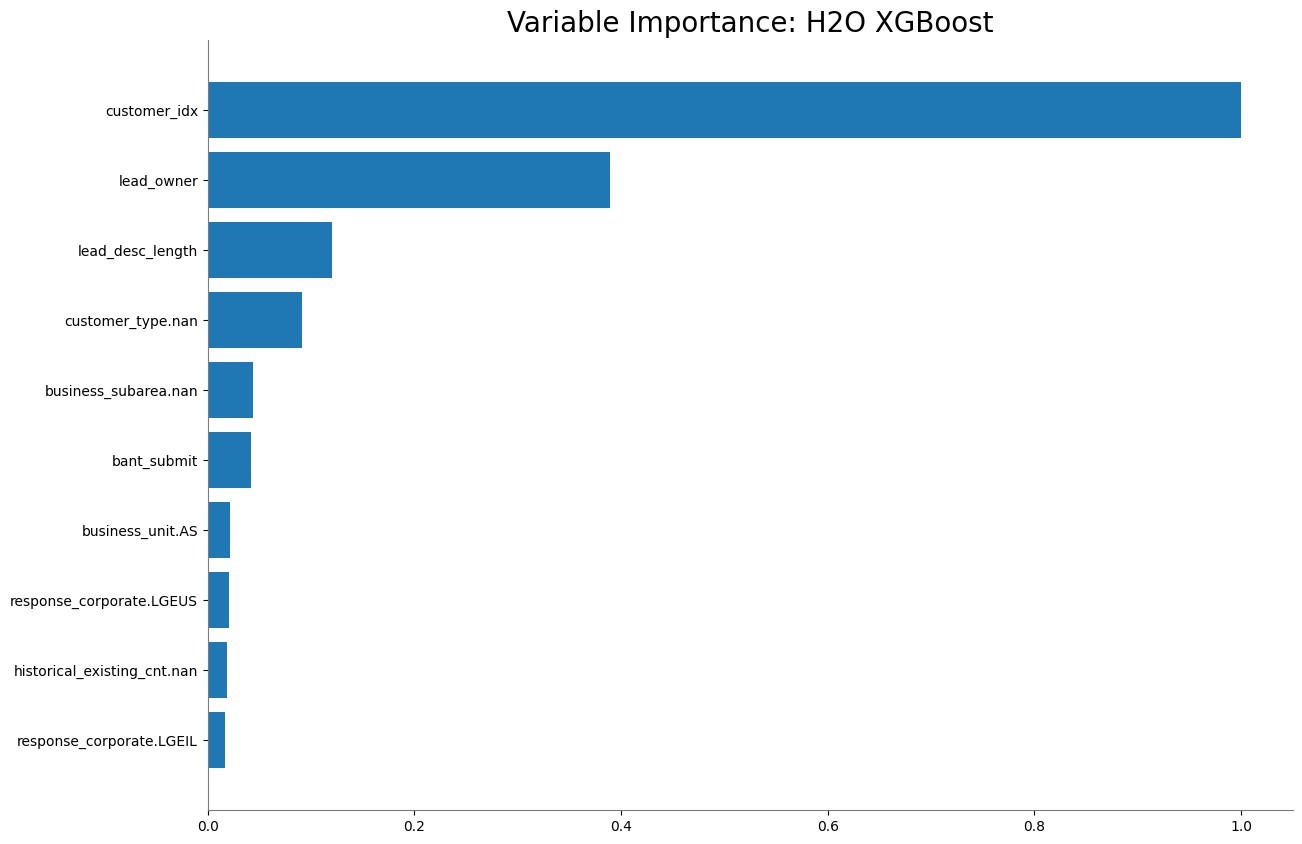

predict
False
False
False
False
False
False
False
False
False
False
[11860 rows x 1 column]

is_converted
False
False
False
False
False
False
False
False
False
False
[11860 rows x 1 column]



/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'customer_country' has levels not trained on: ["/	West Drayton , Harmondsworth/United Kingdom", "/ 451001 / India", "/ 524303 / India", "/ 825409 / India", "/ 844114 / India", "/ Adilabad / India", "/ Ann Arbor / United States", "/ Asansol / India", "/ Baguio city / Philippines", "/ Bahia / Salvador / Brazil", ...2160 not listed..., "tân đông hiệp, dĩ an, bình dương  //Vietnam", "via P.Umberto n.1  /Staiti/Italy", "via galilei 8  /cisliano/Italy", "via milano 314  /brovello carpugnino/Italy", "viale  odino  4  /genova/Italy", "walidwafeek@yahoo.com", "xxx xxx /xxx/United States", "Đà Nẵng  //Vietnam", "Ҭ. ڬܬݬ ѬѬ Ҭ.18  /София/Bulgaria", "Ấp chợ tập sơn trà cú trà vinh  //Vietnam"]
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'customer_country.1' has levels not trained on: ["/	West Drayton , Harmondsworth/United Kingdo

<Figure size 640x480 with 0 Axes>

In [8]:
## 중요 변수 시각화
aml.leader.varimp_plot()

## automl 결과 확인
# Get AutoML object by `project_name`
get_aml = h2o.automl.get_automl(aml.project_name)
# Predict with top model from AutoML Leaderboard on a H2OFrame called 'test'
label_predicted = get_aml.predict(h2o_valid)
print(label_predicted['predict'])
print(h2o_valid['is_converted'])